<div id="container" style="position:relative;">
<div style="float:left"><h1> Stats and Public Health Part 1</h1></div>
<div style="position:relative; float:right">

### Sri Casper

### Dataset

Mosquito_data dataset will be used in this report. The dataset contains information about West Nile Virus (WNV) which is a viral illness largely spread by mosquitos. The disease is transmitted to a person when an infected mosquito bites them. Moreover, the dataset also shows tracking data of mosquito populations and WNV prevalence using a series of traps that were placed around the city by The City of Chicago, Illinois from 2008 to 2019.

#### Data Dictionary

- <b>Year</b>: Year that the WNV test is performed (int64)
- <b>Week</b>: Week that the WNV test is performed (int64)
- <b>Address Block</b>: Address of the location of trap (string)
- <b>Block</b>: Block number of address (int64)
- <b>Trap</b>: Id of the trap (string)
- <b>Trap type</b>: Type of trap (string)
- <b>Date</b>: Date and time that the WNV test is performed (string)
- <b>Mosquito number</b>: Number of mosquitoes caught in this trap (int64)
- <b>Mosquito ID</b>: Id for Mosquito species (string)
- <b>WNV Present</b>: Whether West Nile Virus was present in these mosquitos (string)
- <b>Species</b>: Mosquito species (string)
- <b>Lat</b>: Latitude of trap (float64)
- <b>Lon</b>: Longitude of trap (float64)

#### Field of Interest

Explore the relationships within the dataset, such as mosquito number, species, WNV prevalence, and trap type.

### Data Loading

In [155]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Get the data from a .csv file
# Assign the file to 'mosquito_data'

mosquito_data = pd.read_csv('mosquito_data.csv', index_col = 0)

### Basic Data Wrangling

- Check the shape of the data
- Check the data info
- Check the data head
- Check the data tail
- View some sample sets of the data
- Get a quick breakdown of the summary statistics 

In [157]:
# Shape of the dataframe

mosquito_data.shape

(18495, 12)

- The shape of the dataframe is (18495, 12).

In [158]:
# See a quick summary of each column, the datatypes,
# and the number of non-null values 

mosquito_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18495 entries, 2019 to 2015
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week             18495 non-null  int64  
 1   Address Block    18495 non-null  object 
 2   Block            18495 non-null  int64  
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   Mosquito ID      18495 non-null  object 
 8   WNV Present      18495 non-null  object 
 9   Species          18495 non-null  object 
 10  Lat              15571 non-null  float64
 11  Lon              15571 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [159]:
# Check the data (head)

mosquito_data.head()

,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
Year,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [160]:
# Check the data (tail)

mosquito_data.tail()

,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
Year,,,,,,,,,,,,
2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN


In [161]:
# View 5 sample sets of the data

mosquito_data.sample(5)

,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
Year,,,,,,,,,,,,
2014,35,62XX N MCCLELLAN AVE,62,T236,GRAVID,2014-08-28 00:08:00,5,Pip,negative,CULEX PIPIENS,41.994966,-87.770837
2013,30,100XX W OHARE AIRPORT,100,T923,GRAVID,2013-07-25 00:07:00,5,Res,negative,CULEX RESTUANS,NaN,NaN
2014,30,51XX N MONT CLARE AVE,51,T223,GRAVID,2014-07-24 00:07:00,2,Res,negative,CULEX RESTUANS,41.974523,-87.804589
2015,27,62XX N MCCLELLAN AVE,62,T236,GRAVID,2015-07-09 00:07:00,7,Res,negative,CULEX RESTUANS,41.994966,-87.770837
2018,33,42XX W 65TH ST,42,T235,GRAVID,2018-08-16 00:08:00,26,Res,positive,CULEX RESTUANS,41.774846,-87.727996


In [162]:
# Get a quick breakdown of the summary statistics 
# for numeric columns

# use .T to take the transpose, this makes the columns the rows
# It is useful when you have a large number of columns. 

mosquito_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Week,18495.0,31.004001,4.332020,20.000000,28.000000,31.000000,34.000000,40.000000
Block,18495.0,54.314788,36.712796,1.000000,22.000000,51.000000,89.000000,132.000000
Mosquito number,18495.0,10.879913,13.475066,1.000000,2.000000,5.000000,14.000000,50.000000
Lat,15571.0,41.839963,0.111374,41.644720,41.742670,41.845715,41.945961,42.017801
Lon,15571.0,-87.691642,0.076545,-87.854473,-87.747459,-87.691698,-87.637873,-87.531051


### Data Cleaning

- Check if the columns have the right data
- Check if some of the columns are duplicates
- Check if there is any missing data
- Check if data is of the correct type

#### Find out if there is any duplicate

In [163]:
# Checking for any duplicate

mosquito_data.duplicated()

Year
2019    False
2019    False
2019    False
2019    False
2019    False
        ...  
2016    False
2007    False
2016    False
2017    False
2015     True
Length: 18495, dtype: bool

In [164]:
# Sum the resultant array to get the total number of duplicate rows

mosquito_data.duplicated().sum()  # TRUE = 1

658

In [165]:
# Check what % of the dataset is duplicated

((mosquito_data.duplicated().sum()) / mosquito_data.shape[0]) * 100

3.5577183022438494

In [166]:
# Get rid of the duplicated row,
# but first check what is in them 
# Check if there is any pattern being duplicated

mosquito_data.loc[mosquito_data.duplicated(), :].sort_values('Year')

,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
Year,,,,,,,,,,,,
2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
2007,34,79XX S CHICAGO,79,T083,GRAVID,2007-08-24 00:08:00,14,Pip,positive,CULEX PIPIENS,NaN,NaN
2007,34,79XX S CHICAGO,79,T083,GRAVID,2007-08-24 00:08:00,14,Pip,positive,CULEX PIPIENS,NaN,NaN
2007,31,65XX N OAK PARK AVE,65,T143,GRAVID,2007-08-07 00:08:00,29,Pip,positive,CULEX PIPIENS,NaN,NaN
2007,34,4XX W 127TH,4,T135,CDC,2007-08-24 00:08:00,50,Pip,positive,CULEX PIPIENS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,32,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-08 00:08:00,8,Res,positive,CULEX RESTUANS,NaN,NaN
2019,33,100XX W OHARE AIRPORT,100,T913,GRAVID,2019-08-15 00:08:00,15,Res,positive,CULEX RESTUANS,NaN,NaN
2019,27,100XX W OHARE AIRPORT,100,T905,GRAVID,2019-07-03 00:07:00,4,Res,positive,CULEX RESTUANS,NaN,NaN


- There is a pattern among the duplicates.
- What all duplicates have in common is including 'WNV Present', 'Lat', and 'Lon'.
- However, there is NaN in 'Lat' and 'Lon' which means there is no value.

In [167]:
# Assign the dataframe to 'mdf'

mdf = mosquito_data.drop_duplicates()

In [168]:
# Shape of the clean dataframe

mdf.shape

(17837, 12)

- The shape of the clean dataframe is (17837, 12).

In [169]:
# Checking if there is any duplicate in columns

mdf.T.duplicated()

Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
dtype: bool

#### Find out if there is missing value

In [180]:
# Check if there is any missing value

mdf.isna().sum()

Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
dtype: int64

- There are some missing values in 'Lat' and 'Lon'.

In [181]:
# Calculate the proportion of missing values

(mdf.isna().sum() / mdf.shape[0]) * 100

Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
dtype: float64

#### Clean 'Lat' column

In [182]:
# Get the statistics for 'Lat'

mdf['Lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: Lat, dtype: float64

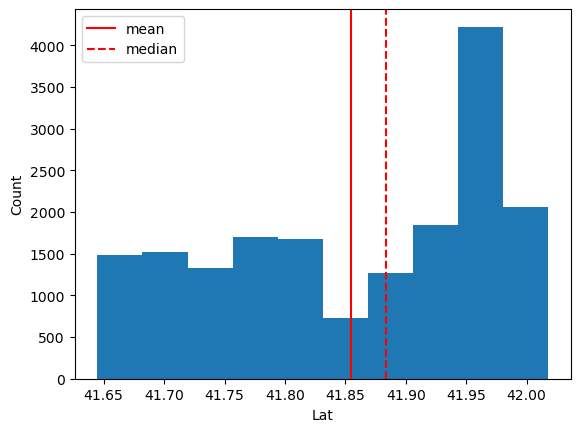

In [197]:
# Plot a histogram for 'Lat'

plt.figure()

plt.hist(mdf['Lat'])
plt.xlabel('Lat')
plt.ylabel('Count')
plt.axvline(mdf['Lat'].mean(), label = 'mean', c = 'r')
plt.axvline(mdf['Lat'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

In [185]:
# Get mode of 'Lat'

lat_mode = mdf['Lat'].mode()[0]

lat_mode

41.956298856

In [186]:
# Fill the missing values with mode

mdf.loc[:, 'Lat'] = mdf.loc[:,'Lat'].fillna(lat_mode)

/var/folders/3r/xt5d5yjn5vj2x8xpx00xsy4c0000gn/T/ipykernel_2092/2885193029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf.loc[:, 'Lat'] = mdf.loc[:,'Lat'].fillna(lat_mode)


In [187]:
# Sanity check

mdf['Lat'].isna().sum()

0

In [188]:
# Check if there is any missing value

mdf.isna().sum()

Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                   0
Lon                2266
dtype: int64

- There are some missing values in 'Lon'.

In [25]:
mdf.head()

,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
Year,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.956299,NaN
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


#### Clean 'Lon' column

In [189]:
# Get the statistics for 'Lon'

mdf['Lon'].describe()

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: Lon, dtype: float64

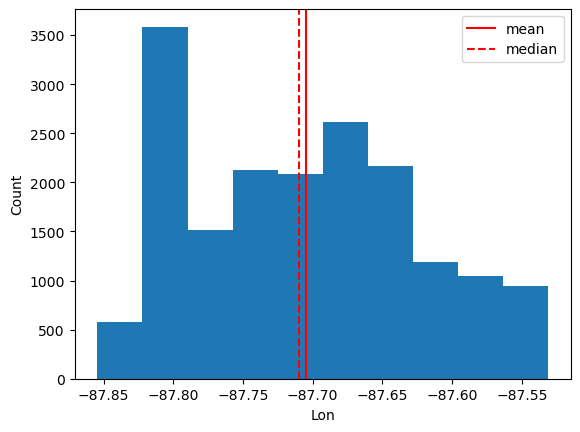

In [196]:
# Plot a histogram for 'Lon'

plt.figure()

plt.hist(mdf['Lon'])
plt.xlabel('Lon')
plt.ylabel('Count')
plt.axvline(mdf['Lon'].mean(), label = 'mean', c = 'r')
plt.axvline(mdf['Lon'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

In [192]:
# Get mode of 'Lon'

lon_mode = mdf['Lon'].mode()[0]

lon_mode

-87.797517445

In [193]:
# Fill the missing values with mode

mdf.loc[:, 'Lon'] = mdf.loc[:,'Lon'].fillna(lon_mode)

/var/folders/3r/xt5d5yjn5vj2x8xpx00xsy4c0000gn/T/ipykernel_2092/1420073900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf.loc[:, 'Lon'] = mdf.loc[:,'Lon'].fillna(lon_mode)


In [194]:
# Sanity check

mdf['Lon'].isna().sum()

0

In [195]:
# Check if there is still any missing value

mdf.isna().sum()

Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

- There is no missing value.

#### Convert the 'Date' column to have a datetime format

In [198]:
# View sample of 'Date' column

mdf['Date'].sample(5)

Year
2016    2016-08-25 00:08:00
2014    2014-07-31 00:07:00
2009    2009-07-27 00:07:00
2012    2012-08-03 00:08:00
2016    2016-09-01 00:09:00
Name: Date, dtype: object

- There is a pattern of 'Date' where the data is shown as 'Test Date - Time'

In [199]:
# Identify where to split

mdf['Date'].str.split(' ')

Year
2019    [2019-09-26, 00:09:00]
2019    [2019-09-26, 00:09:00]
2019    [2019-09-26, 00:09:00]
2019    [2019-09-26, 00:09:00]
2019    [2019-09-26, 00:09:00]
                 ...          
2013    [2013-08-29, 00:08:00]
2016    [2016-09-09, 00:09:00]
2007    [2007-08-24, 00:08:00]
2016    [2016-07-27, 00:07:00]
2017    [2017-08-17, 00:08:00]
Name: Date, Length: 17837, dtype: object

In [200]:
date_df = mdf['Date'].str.split(' ', expand = True)

In [201]:
date_df.head()

,0,1
Year,,
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00


In [202]:
# Rename the columns to 'Test Date' and 'Time'

date_df = date_df.rename(columns = {0:'Test Date', 1:'Time'})

In [203]:
# Check if the column names changed

date_df.head()

,Test Date,Time
Year,,
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00
2019,2019-09-26,00:09:00


In [204]:
# Use these outputs to reinject Test Date and Time info into clean_data

mdf = pd.concat([mdf, date_df], axis = 1)

In [205]:
# Sanity check

mdf.head()

,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Test Date,Time
Year,,,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.956299,-87.797517,2019-09-26,00:09:00
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,2019-09-26,00:09:00
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,2019-09-26,00:09:00
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,2019-09-26,00:09:00
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,2019-09-26,00:09:00


In [206]:
# Drop 'Date' column

mdf = mdf.drop(columns = 'Date')

In [207]:
# Check if 'Date' column is dropped

mdf.head()

,Week,Address Block,Block,Trap,Trap type,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Test Date,Time
Year,,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2,Res,negative,CULEX RESTUANS,41.956299,-87.797517,2019-09-26,00:09:00
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,2019-09-26,00:09:00
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,2019-09-26,00:09:00
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,2019-09-26,00:09:00
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,2019-09-26,00:09:00


In [208]:
# Check if there is any missing value in the new columns

mdf.isna().sum()

Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
Test Date          0
Time               0
dtype: int64

In [209]:
# Check if there is any missing value (or unknown) in 'Test Date'

mdf['Test Date'].unique()

array(['2019-09-26', '2019-09-19', '2019-09-12', '2019-09-05',
       '2019-08-29', '2019-08-22', '2019-08-15', '2019-08-08',
       '2019-08-01', '2019-07-25', '2019-07-18', '2019-07-12',
       '2019-07-11', '2019-07-03', '2019-06-27', '2019-06-21',
       '2019-06-20', '2019-06-14', '2019-06-13', '2019-06-12',
       '2018-09-27', '2018-09-20', '2018-09-13', '2018-09-06',
       '2018-08-30', '2018-08-23', '2018-08-16', '2018-08-09',
       '2018-08-02', '2018-07-26', '2018-07-19', '2018-07-12',
       '2018-07-05', '2018-06-29', '2018-06-28', '2018-06-21',
       '2018-06-14', '2018-06-08', '2017-09-28', '2017-09-21',
       '2017-09-14', '2017-09-08', '2017-08-31', '2017-08-24',
       '2017-08-17', '2017-08-10', '2017-08-03', '2017-07-27',
       '2017-07-20', '2017-07-14', '2017-06-29', '2017-06-22',
       '2017-06-19', '2017-06-16', '2016-09-29', '2016-09-23',
       '2016-09-22', '2016-09-15', '2016-09-09', '2016-09-08',
       '2016-09-01', '2016-08-25', '2016-08-19', '2016-

In [210]:
# See what the most and the least occurring Test Date are

mdf['Test Date'].value_counts()

2007-08-01    283
2016-08-11    220
2016-08-04    215
2007-08-15    210
2014-08-21    209
             ... 
2009-06-22      7
2009-06-03      6
2010-06-02      5
2007-08-03      2
2008-07-21      1
Name: Test Date, Length: 285, dtype: int64

- There is no missing value or 'unknown' in 'Test Date' column.

In [211]:
# Check if there is any missing value (or unknown) in 'Time'

mdf['Time'].unique()

array(['00:09:00', '00:08:00', '00:07:00', '00:06:00', '00:10:00',
       '00:05:00', '08:08:19', '02:08:57', '02:08:53', '02:08:34',
       '02:08:26', '02:08:23', '02:08:08', '11:07:18', '11:07:17',
       '03:07:41', '03:07:40', '03:07:33', '02:07:45', '11:06:17',
       '04:06:59', '04:06:58', '04:06:56', '04:06:07', '04:06:06'],
      dtype=object)

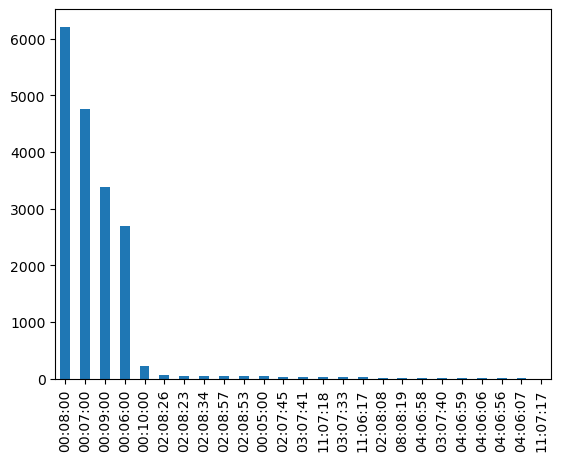

In [213]:
# Another way to check if there is any missing value

mdf['Time'].value_counts().plot(kind = 'bar');

- There is no missing value or 'unknown' in 'Time' column.

In [212]:
# See what the most and the least occurring Time are

mdf['Time'].value_counts()

00:08:00    6210
00:07:00    4764
00:09:00    3375
00:06:00    2693
00:10:00     225
02:08:26      60
02:08:23      53
02:08:34      51
02:08:57      50
02:08:53      47
00:05:00      42
02:07:45      37
03:07:41      35
11:07:18      34
03:07:33      32
11:06:17      29
02:08:08      22
08:08:19      21
04:06:58      13
03:07:40      11
04:06:59      10
04:06:06       9
04:06:56       6
04:06:07       5
11:07:17       3
Name: Time, dtype: int64

- The majority of frequency falls into the time between 06:00 to 08:00.

In [94]:
# Sanity check

mdf.isna().sum()

Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Lat                0
Lon                0
Test Date          0
Time               0
geometry           0
dtype: int64

In [215]:
# Check across the table

mdf.isna().sum().sum()

0

- There is no more null value.

In [216]:
# Sanity check

mdf.head()

,Week,Address Block,Block,Trap,Trap type,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon,Test Date,Time
Year,,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2,Res,negative,CULEX RESTUANS,41.956299,-87.797517,2019-09-26,00:09:00
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925,2019-09-26,00:09:00
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417,2019-09-26,00:09:00
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987,2019-09-26,00:09:00
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049,2019-09-26,00:09:00


#### Compare the values in 'Mosquito ID' and 'Species'

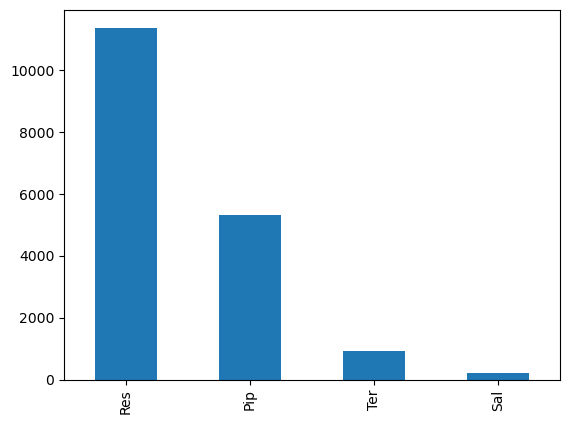

In [218]:
# 'Mosquito ID'

mdf['Mosquito ID'].value_counts().plot(kind = 'bar');

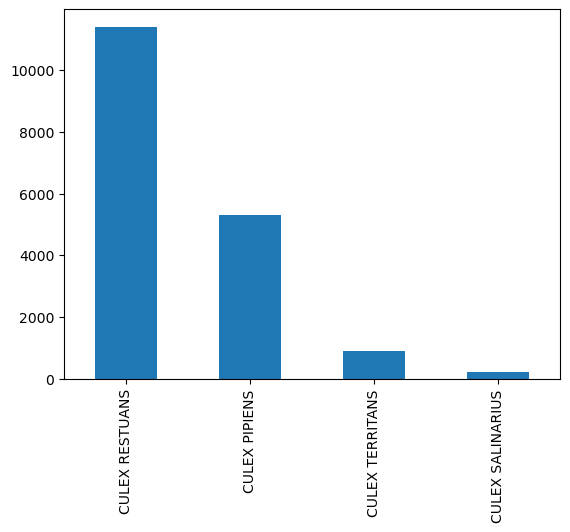

In [219]:
# 'Species'

mdf['Species'].value_counts().plot(kind = 'bar');

In [220]:
mdf.describe

<bound method NDFrame.describe of       Week           Address Block  Block   Trap Trap type  Mosquito number  \
Year                                                                          
2019    39   100XX W OHARE AIRPORT    100   T910    GRAVID                2   
2019    39       52XX S KOLMAR AVE     52   T114    GRAVID                1   
2019    39      58XX N WESTERN AVE     58   T028    GRAVID                2   
2019    39  39XX N SPRINGFIELD AVE     39   T228    GRAVID                1   
2019    39     131XX S BRANDON AVE    131   T209    GRAVID                9   
...    ...                     ...    ...    ...       ...              ...   
2013    35          63XX W 64TH ST     63   T155    GRAVID                3   
2016    36           3XX W 18TH ST      3   T043    GRAVID                4   
2007    34    46XX N MILWAUKEE AVE     46   T003    GRAVID               19   
2016    30        127XX S DOTY AVE    127   T115    GRAVID               34   
2017    33      20

- Notice that the values in the two columns are exactly the same

In [221]:
mdf.groupby(['Mosquito ID','Species'])['Species'].count()

Mosquito ID  Species         
Pip          CULEX PIPIENS        5311
Res          CULEX RESTUANS      11387
Sal          CULEX SALINARIUS      222
Ter          CULEX TERRITANS       917
Name: Species, dtype: int64

In [222]:
# Check the amount of values in 'Mosquito ID'

mdf['Mosquito ID'].value_counts()

Res    11387
Pip     5311
Ter      917
Sal      222
Name: Mosquito ID, dtype: int64

In [223]:
# Check the amount of values in 'Species'

mdf['Species'].value_counts()

CULEX RESTUANS      11387
CULEX PIPIENS        5311
CULEX TERRITANS       917
CULEX SALINARIUS      222
Name: Species, dtype: int64

- Notice that the amount of values in the two columns are exactly the same

In [225]:
# Drop the column 'Species' since its values are exactly the same as the ones in 'Mosquito ID'

mdf = mdf.drop(columns = 'Species')

'Species' should be droped since it has exactly the same data as 'Mosquito ID'.

In [226]:
# Returns the shape of the updated dataframe

mdf.shape

(17837, 12)

In [227]:
# See a quick updated summary of each column

mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 2019 to 2017
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week             17837 non-null  int64  
 1   Address Block    17837 non-null  object 
 2   Block            17837 non-null  int64  
 3   Trap             17837 non-null  object 
 4   Trap type        17837 non-null  object 
 5   Mosquito number  17837 non-null  int64  
 6   Mosquito ID      17837 non-null  object 
 7   WNV Present      17837 non-null  object 
 8   Lat              17837 non-null  float64
 9   Lon              17837 non-null  float64
 10  Test Date        17837 non-null  object 
 11  Time             17837 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.3+ MB


In [228]:
# Sanity check

mdf.head()

,Week,Address Block,Block,Trap,Trap type,Mosquito number,Mosquito ID,WNV Present,Lat,Lon,Test Date,Time
Year,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2,Res,negative,41.956299,-87.797517,2019-09-26,00:09:00
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,1,Res,negative,41.798211,-87.736925,2019-09-26,00:09:00
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2,Res,negative,41.987245,-87.689417,2019-09-26,00:09:00
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,1,Res,negative,41.953664,-87.724987,2019-09-26,00:09:00
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,9,Res,negative,41.657069,-87.546049,2019-09-26,00:09:00


#### Analyze two numerical and two categorical columns

- Categorical variables -> Bar chart
- Numerical variables -> Histogram

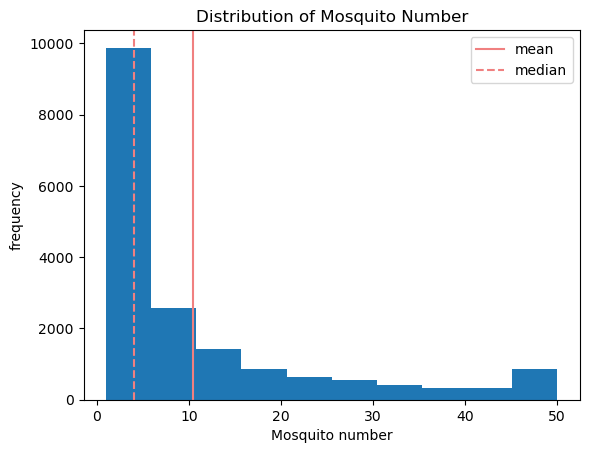

In [231]:
# Plot a histogram for 'Mosquito number' which is a numerical column

plt.figure()

plt.hist(mdf['Mosquito number'])
plt.title('Distribution of Mosquito Number')
plt.xlabel('Mosquito number')
plt.ylabel('frequency')
plt.axvline(mdf['Mosquito number'].mean(), color="lightcoral", label="mean")
plt.axvline(mdf['Mosquito number'].median(), color="lightcoral", linestyle="--", label="median")

plt.legend()
plt.show()

In [234]:
mdf['Mosquito number'].median()

4.0

In [233]:
mdf['Mosquito number'].describe()

count    17837.000000
mean        10.458822
std         13.182843
min          1.000000
25%          2.000000
50%          4.000000
75%         13.000000
max         50.000000
Name: Mosquito number, dtype: float64

A relevant insights that this graph reveal: 

   - The mosquito number skews smaller with a long tail of larger number but fewer amount of them. There is a narrow interquartile range between approximately 1-21, meaning that half our observations lie in this narrow range.
   - Additionally, the median is 4 while the mean is 10.46.

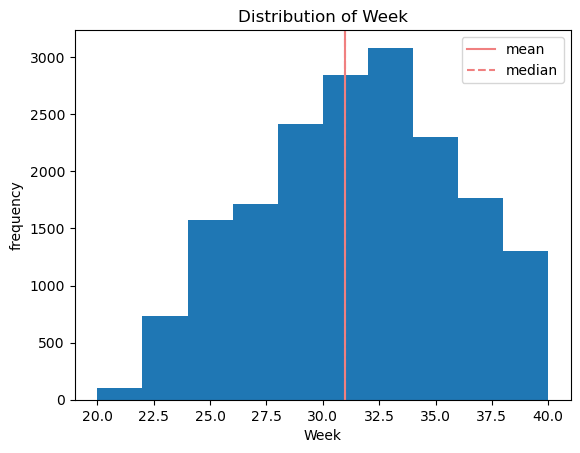

In [235]:
# Plot a histogram for 'Week' which is a numerical column

plt.figure()

plt.hist(mdf['Week'])
plt.title('Distribution of Week')
plt.xlabel('Week')
plt.ylabel('frequency')
plt.axvline(mdf['Week'].mean(), color="lightcoral", label="mean")
plt.axvline(mdf['Week'].median(), color="lightcoral", linestyle="--", label="median")

plt.legend()
plt.show()

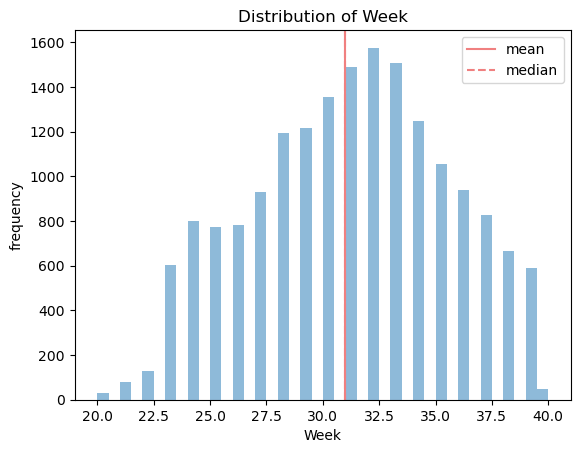

In [236]:
# Plot another histogram for 'Week' with bins = 40

plt.figure()

plt.hist(mdf['Week'], bins = 40, alpha = 0.5)
plt.title('Distribution of Week')
plt.xlabel('Week')
plt.ylabel('frequency')
plt.axvline(mdf['Week'].mean(), color="lightcoral", label="mean")
plt.axvline(mdf['Week'].median(), color="lightcoral", linestyle="--", label="median")

plt.legend()
plt.show()

In [237]:
mdf['Week'].median()

31.0

In [239]:
mdf['Week'].describe()

count    17837.000000
mean        30.979088
std          4.377505
min         20.000000
25%         28.000000
50%         31.000000
75%         34.000000
max         40.000000
Name: Week, dtype: float64

A relevant insights that this graph reveal: 

   - The graph looks almost like a normal distribution. This would suggest that there is a majority of the population lie in week 32.
   - Additionally, the median is 31 while the mean is 30.979. That is why it looks like the lines of the mean and median lie on top of each other.

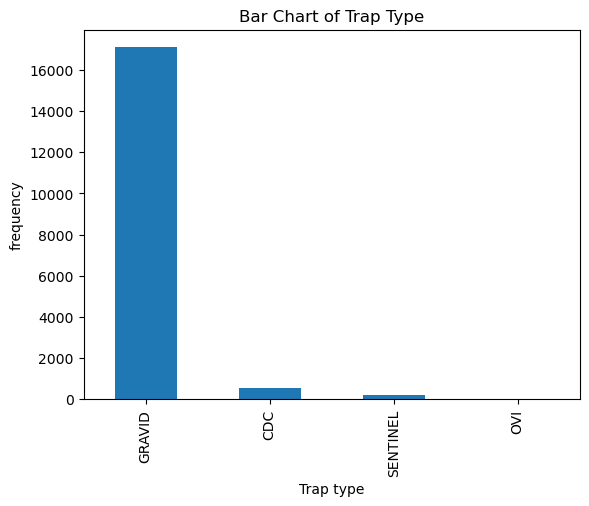

In [240]:
# Plot a bar chart for 'Week' which is a categorical column

mdf['Trap type'].value_counts().plot(kind = 'bar');
plt.title('Bar Chart of Trap Type')
plt.xlabel('Trap type')
plt.ylabel('frequency');

In [243]:
mdf['Trap type'].describe()

count      17837
unique         4
top       GRAVID
freq       17098
Name: Trap type, dtype: object

A relevant insights that this graph reveal: 

   - The bar chart shows that there are four types of trap including GRAVID, CDC, SENTINEL, and OVI. And GRAVID is the most used trap type at 17,098 traps.
   - Additionally, there are 17,837 values in total.

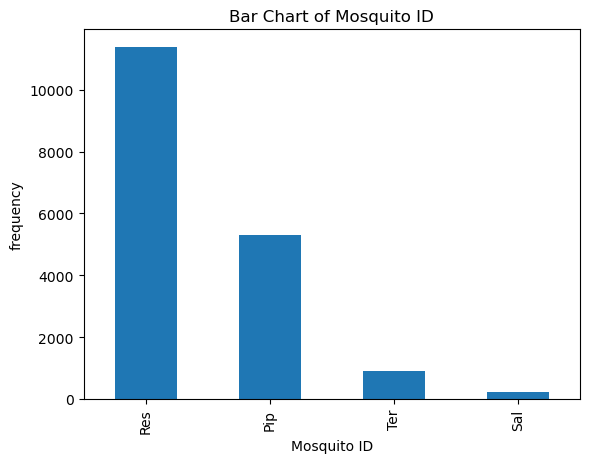

In [241]:
# Plot a bar chart for 'Mosquito ID' which is a categorical column

mdf['Mosquito ID'].value_counts().plot(kind = 'bar')
plt.title('Bar Chart of Mosquito ID')
plt.xlabel('Mosquito ID')
plt.ylabel('frequency');

In [244]:
mdf['Mosquito ID'].describe()

count     17837
unique        4
top         Res
freq      11387
Name: Mosquito ID, dtype: object

A relevant insights that this graph reveal: 

   - The bar chart shows that there are four mosquito IDs or species including Res, Pip, Ter, and Sal. The number of mosquitos declines respectively while having Res as the highest specie at 11,387.
   - The bar chart shows that there are four types of trap including GRAVID, CDC, SENTINEL, and OVI. And GRAVID is the most used trap type at 17,098 traps.
   - Additionally, there are 17,837 values in total.

### Exploratory Data Analysis (EDA)

In [245]:
# View the column names with some values in each column

mdf.head()

,Week,Address Block,Block,Trap,Trap type,Mosquito number,Mosquito ID,WNV Present,Lat,Lon,Test Date,Time
Year,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2,Res,negative,41.956299,-87.797517,2019-09-26,00:09:00
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,1,Res,negative,41.798211,-87.736925,2019-09-26,00:09:00
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2,Res,negative,41.987245,-87.689417,2019-09-26,00:09:00
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,1,Res,negative,41.953664,-87.724987,2019-09-26,00:09:00
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,9,Res,negative,41.657069,-87.546049,2019-09-26,00:09:00


#### Explore the relationship between 'Mosquito number' and 'Test Date'

<Figure size 640x480 with 0 Axes>

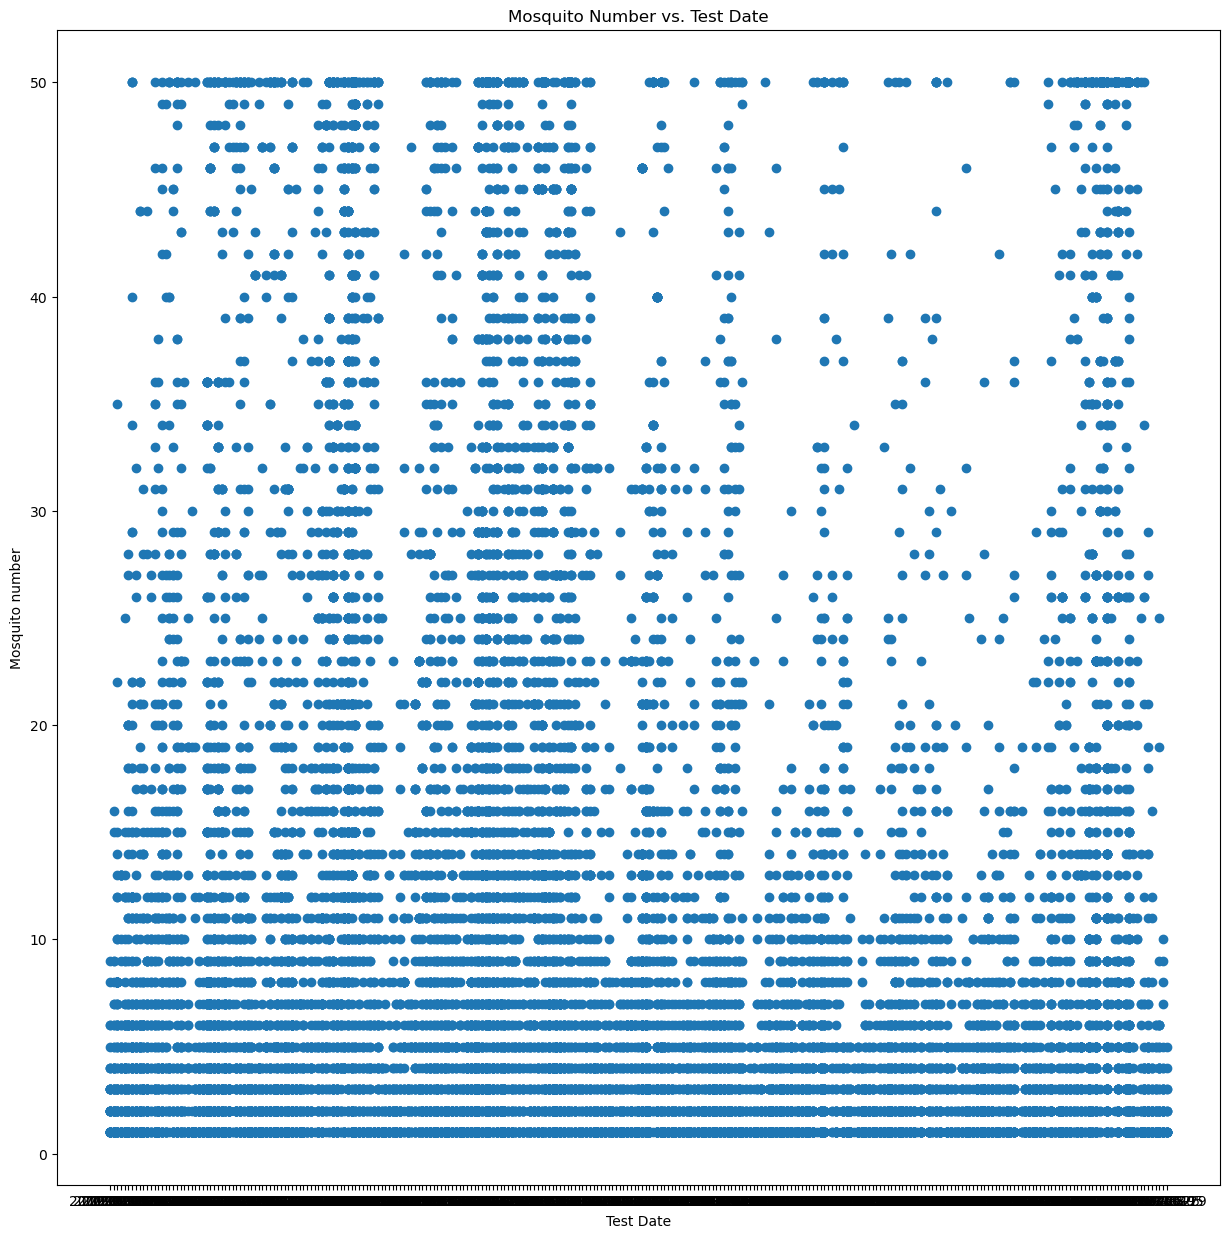

In [255]:
# Create a scatter plot between 'Mosquito number' and 'Test Date'

plt.figure()
fig,ax = plt.subplots(figsize = (15, 15))

plt.scatter(mdf['Test Date'], mdf['Mosquito number'])
plt.title('Mosquito Number vs. Test Date')
plt.xlabel('Test Date')
plt.ylabel('Mosquito number')

plt.show()

In [287]:
# Group the number of mosquitos by test date

mdf.groupby(['Mosquito number','Test Date'])['Test Date'].count()

Mosquito number  Test Date 
1                2007-05-29     9
                 2007-06-05    19
                 2007-06-26    20
                 2007-06-29    15
                 2007-07-02    17
                               ..
50               2019-06-13     6
                 2019-06-20     3
                 2019-06-27     1
                 2019-07-11     1
                 2019-08-15     3
Name: Test Date, Length: 4785, dtype: int64

A relevant insights that this graph reveal: 

   - The scatter plot between 'Mosquito number' and 'Test Date' shows that the majority of mosquito number is in the second quarter.
   - After that, the pattern of the dots is expanding and increasing again towarding the end of when the WNV test is performed.

### Advanced EDA

#### Explore the relationship between Mosquito Species and WNV Prevalence

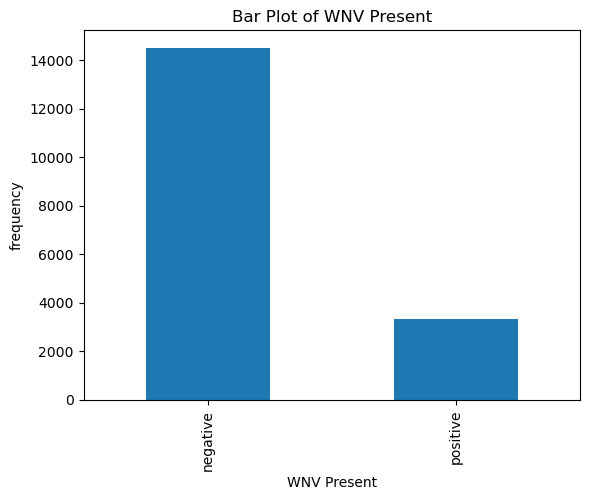

In [280]:
# Create a bar plot for 'WNV Present'

mdf['WNV Present'].value_counts().plot(kind = 'bar')
plt.title('Bar Plot of WNV Present')
plt.xlabel('WNV Present')
plt.ylabel('frequency');

In [285]:
# Group the mosquito ID by WNV present

mdf.groupby(['Mosquito ID','WNV Present'])['WNV Present'].count()

Mosquito ID  WNV Present
Pip          negative       4074
             positive       1237
Res          negative       9309
             positive       2078
Sal          negative        215
             positive          7
Ter          negative        903
             positive         14
Name: WNV Present, dtype: int64

In [288]:
# Proportion of whether WNV present or not based on the mosquito ID (species)

mdf.groupby(['Mosquito ID','WNV Present'])['WNV Present'].count() / mdf.groupby('Mosquito ID')['WNV Present'].count()

Mosquito ID  WNV Present
Pip          negative       0.767087
             positive       0.232913
Res          negative       0.817511
             positive       0.182489
Sal          negative       0.968468
             positive       0.031532
Ter          negative       0.984733
             positive       0.015267
Name: WNV Present, dtype: float64

In [290]:
# Group WNV present by mosquito ID (species)

mosquito_present_data = (mdf.groupby(['Mosquito ID','WNV Present'])['WNV Present'].count() / mdf.groupby('Mosquito ID')['WNV Present'].count())*100

mosquito_present_data.unstack()[['positive','negative']]

WNV Present,positive,negative
Mosquito ID,,
Pip,23.291282,76.708718
Res,18.248880,81.751120
Sal,3.153153,96.846847
Ter,1.526718,98.473282


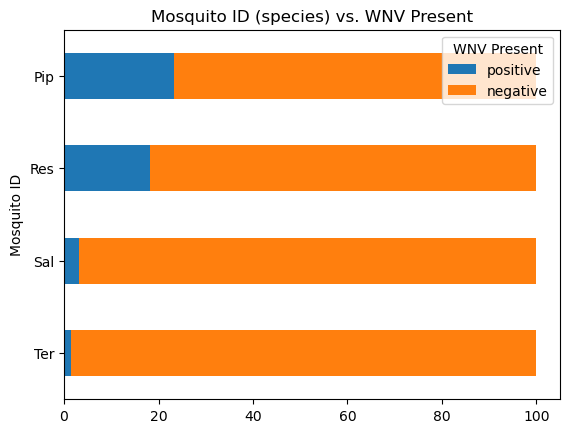

In [293]:
# Create a stacked horizontal bar plot between 'Mosquito ID (species)' vs. 'WNV prevalence'
# Find out which mosquito ID (species) are more likely to show up (or positive)

mosquito_present_data.unstack()[['positive','negative']].sort_values('positive').plot(kind = 'barh', stacked = True)
plt.title('Mosquito ID (species) vs. WNV Present');

A relevant insights that this graph reveal: 

   - The stacked horizontal bar plot between 'Mosquito ID' and 'WNV Present' shows that the majority, over 20%, of mosquito ID/species that is present is Pip or Pipiens.
   - However, the rest of the species (Res, Sal, Ter) are present below 20%.

#### Explore the relationship between mosquito caught and trap type

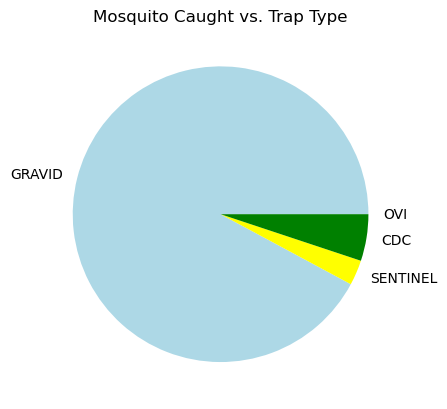

In [318]:
# Create a pie chart between 'Mosquito Number' (or mosquito caught) and 'Trap Type'

# Sum the amount of mosquito caught for each trap type
gravid = mdf.loc[mdf['Trap type'] == 'GRAVID', 'Mosquito number'].sum()
sentinel = mdf.loc[mdf['Trap type'] == 'SENTINEL', 'Mosquito number'].sum()
cdc = mdf.loc[mdf['Trap type'] == 'CDC', 'Mosquito number'].sum()
ovi = mdf.loc[mdf['Trap type'] == 'OVI', 'Mosquito number'].sum()

# Create lebels
labels = ['GRAVID', 'SENTINEL', 'CDC', 'OVI']
size_of_groups=[gravid,sentinel,cdc,ovi]

# Create set of colors
colors = ['lightblue', 'yellow', 'green', 'red']

# Create a pie plot
plt.pie(size_of_groups, labels=labels, colors = colors)
plt.title('Mosquito Caught vs. Trap Type')

# To create a donut chart
# Add a circle at the center to transform it in a donut chart
# my_circle = plt.Circle( (0,0), 0.7, color='white')
# p = plt.gcf()
# p.gca().add_artist(my_circle)

plt.show()

In [301]:
mdf.groupby(['Trap type']).count()

,Week,Address Block,Block,Trap,Mosquito number,Mosquito ID,WNV Present,Lat,Lon,Test Date,Time
Trap type,,,,,,,,,,,
CDC,529,529,529,529,529,529,529,529,529,529,529
GRAVID,17098,17098,17098,17098,17098,17098,17098,17098,17098,17098,17098
OVI,1,1,1,1,1,1,1,1,1,1,1
SENTINEL,209,209,209,209,209,209,209,209,209,209,209


A relevant insights that this graph reveal: 

   - The pie chart between 'Mosquito number' (or mosquito caught) and 'Trap type' shows that the majority (95.85%) of the mosquitos is caught by Gravid trap.
   - However, the amount of mosquito caught by other types of trap are very low. Moreover, the mosquitos are barely caught by OVI trap.

#### Explore the relationship between Map (Lat & Lon) and WNV Present

In [327]:
# Import descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [324]:
# Import the .shp file of the map
# Source: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk

map_view = gpd.read_file('Boundaries-City/geo_export_54e1ae2a-3bc3-436a-ad00-c62951e30092.shp')

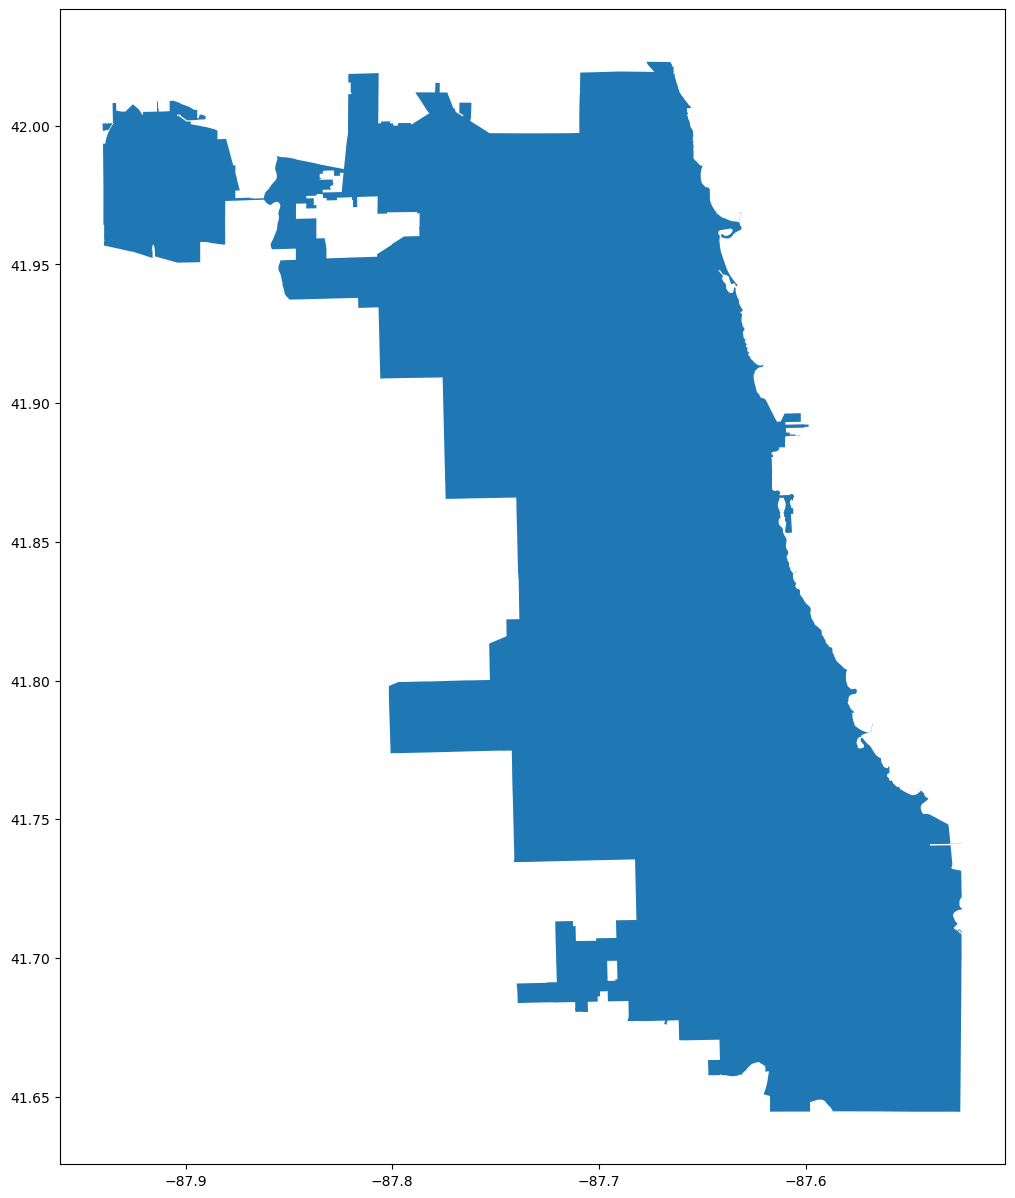

In [328]:
# Plot the map layout

fig,ax = plt.subplots(figsize = (15, 15))
map_view.plot(ax = ax);

In [329]:
# Plot the map using 'Lon' and 'Lat'

crs = {'init': 'epsg:4326'}

# Assign 'geometry' in a zap file format
geometry = [Point(xy) for xy in zip(mdf['Lon'], mdf['Lat'])]
geometry[:3]

[<POINT (-87.798 41.956)>, <POINT (-87.737 41.798)>, <POINT (-87.689 41.987)>]

In [330]:
# Assign 'geo' to the dataframe above

geo = gpd.GeoDataFrame(mdf, crs = crs, geometry = geometry)

geo.head()

/Users/srisrisakul/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Week,Address Block,Block,Trap,Trap type,Mosquito number,Mosquito ID,WNV Present,Lat,Lon,Test Date,Time,geometry
Year,,,,,,,,,,,,,
2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2,Res,negative,41.956299,-87.797517,2019-09-26,00:09:00,POINT (-87.79752 41.95630)
2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,1,Res,negative,41.798211,-87.736925,2019-09-26,00:09:00,POINT (-87.73692 41.79821)
2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2,Res,negative,41.987245,-87.689417,2019-09-26,00:09:00,POINT (-87.68942 41.98724)
2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,1,Res,negative,41.953664,-87.724987,2019-09-26,00:09:00,POINT (-87.72499 41.95366)
2019,39,131XX S BRANDON AVE,131,T209,GRAVID,9,Res,negative,41.657069,-87.546049,2019-09-26,00:09:00,POINT (-87.54605 41.65707)


- This results in adding the column 'geometry' to the dataframe.

In [331]:
# Import make_axes_locatable

from mpl_toolkits.axes_grid1 import make_axes_locatable

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


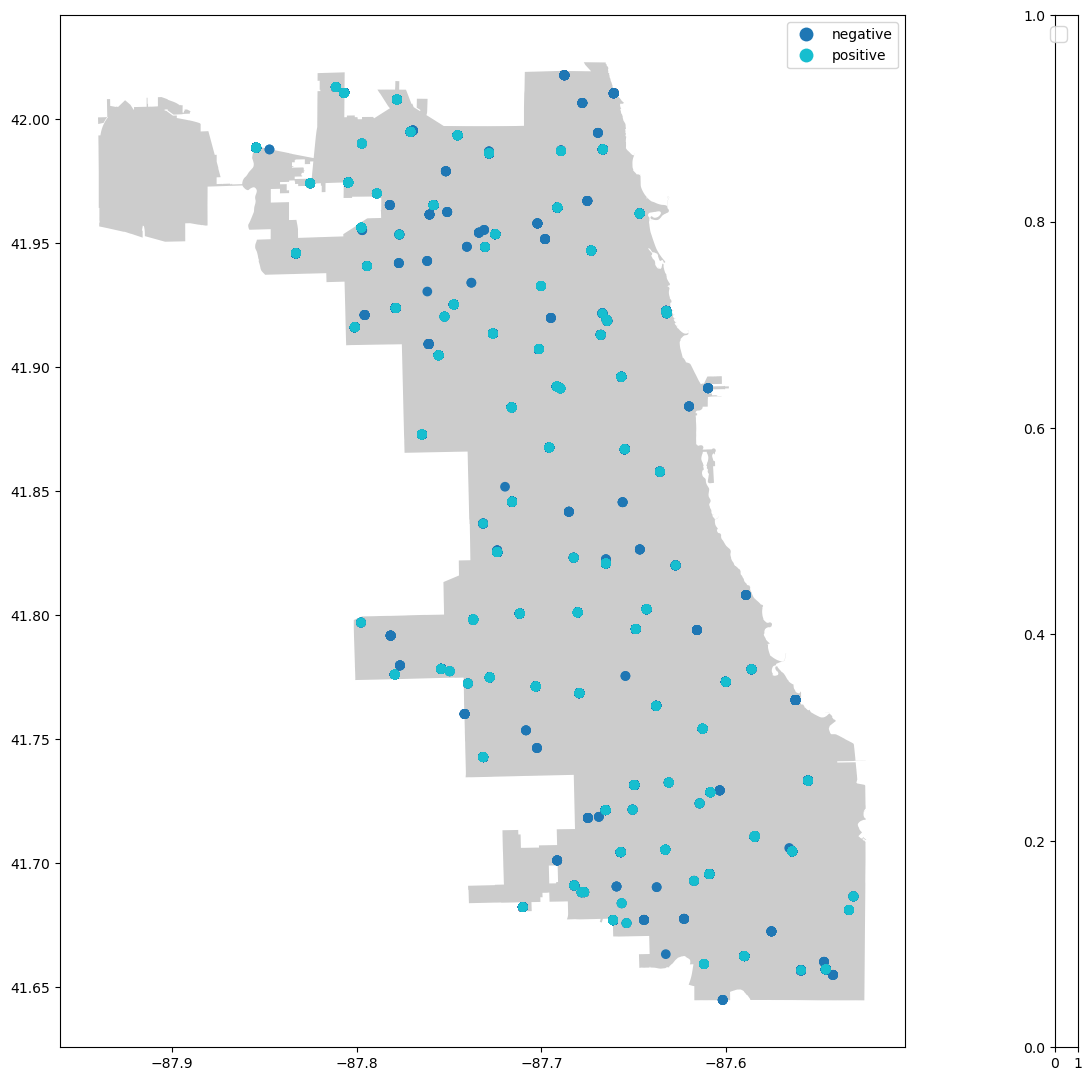

In [332]:
# Plot 'WNV Present' on the map

# Size of the map
fig,ax = plt.subplots(figsize = (15, 15))

# Plot the map
map_view.plot(ax = ax, alpha = 0.4, color = 'grey')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "2%", pad = "0.5%")
geo.plot(column = 'WNV Present', label = 'WNV', ax = ax, legend = True)
plt.legend(prop = {'size': 15});

A relevant insights that this graph reveal: 

   - According to the map, it looks like there is no pattern of WNV present. The virus spreads all over the map, the City of Chicago.

### Findings Summary

Findings that have been found in the dataframe:

- There is a pattern among the duplicates. What all duplicates have in common is including 'WNV Present', 'Lat', and 'Lon'. However, there is NaN in 'Lat' and 'Lon' which means there is no value.
- There is a pattern of 'Date' where the data is shown as 'Test Date - Time'
- The majority of frequency falls into the time between 06:00 to 08:00.
- The values as well as the amount of values in the columns ‘Mosquito ID’ and ’Species’ are exactly the same.
- The majority of the population lie in week 32.

### Conclusions

Summarize what has been found from the initial analysis:

- GRAVID is the most used trap type and OVI is the least used one.
- The majority of the mosquitos is Restuans and the least one is Salinarius.
- Pipiens is the majority of the mosquito species presents.
- The majority of the mosquitos is caught by Gravid trap.
- To improve the test, the amount of the trap types should be used equally in each test spot in order to compare which type would attach the moquitos the most. Also, it is possible that a certain type of trap might be more likely to attach a certain species. Moreover, the amount of mosquitos present could be affected by the weather during the certain time of the year.

### Saving the data

After spending time cleaning and exploring this dataset, the cleaned dataset should be saved:

In [ ]:
mdf.to_csv('clean_mosquito_data.csv', index = False)